# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

<Figure size 1000x600 with 0 Axes>

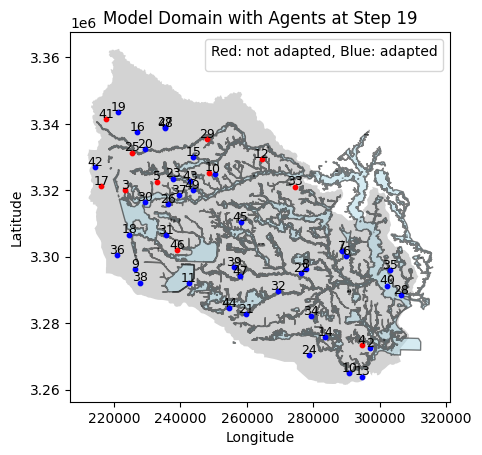

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz",top_down=True, people_centered=True) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matop_downlotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 19 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        #fig, ax = plt.subplots(figsize=(7, 7))
        #plot_network(ax, model)
        #plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.636894              0.569529          0.000000   
     1                   0.354961              0.467459          0.000000   
     2                   0.549526              0.543767          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.000000              0.000000          0.000000   
...                           ...                   ...               ...   
19   45                  2.595079              0.814802          1.319950   
     46                  0.000000              0.000000          0.000000   
     47                  2.290331              0.792990          2.096772   
     48                  0.736382              0.594871          0.580577   
     49                  0.711384              0.588841          0.413604   

              FloodDamageActual  IsAdapted  RiskAppraisal  CopingAppraisal  \
Step AgentID                                                                 
0    0                 0.000000      False       0.012321         0.028703   
     1                 0.000000      False       0.000846         0.051456   
     2                 0.000000      False       0.039437         0.050727   
     3                 0.000000      False       0.000000         0.000000   
     4                 0.000000      False       0.000000         0.000000   
...                         ...        ...            ...              ...   
19   45                0.063006       True       0.879800         0.835934   
     46                0.000000      False       0.000000         0.000000   
     47                0.282499       True       0.912514         0.882571   
     48                0.553364       True       0.716501         0.695696   
     49                0.229062       True       0.612923         0.570675   

                                                   location  
Step AgentID                                                 
0    0        POINT (250332.93498580978 3324915.1508125956)  
     1        POINT (248509.89176742197 3325323.3757406957)  
     2        POINT (297088.13764180493 3272549.8068815526)  
     3          POINT (223385.1877735598 3320171.049182582)  
     4         POINT (294568.6020528717 3273405.9779016413)  
...                                                     ...  
19   45       POINT (258095.81818272037 3310399.8651780146)  
     46       POINT (239010.84957957914 3302012.7602784834)  
     47        POINT (258023.38415366423 3294147.028128213)  
     48        POINT (235495.2134883468 3338845.9929347495)  
     49        POINT (243670.15555425492 3320197.020521105)  

[1000 rows x 8 columns]

# Running the model multiple times and visualizing adapation variances

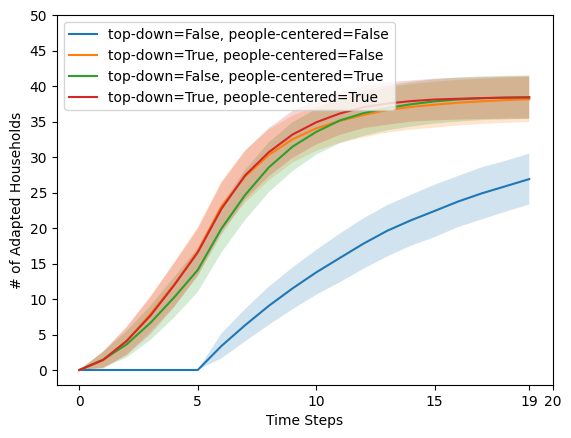

In [3]:
# Define the different top_down and people_centered settings
scenarios = [[False,False],[True,False],[False,True],[True,True]]

# Set the flood map choice to '100yr'
flood_map_choice = "harvey"
number_runs = 300
# Create a new figure
plt.figure()

adaptation_data = pd.DataFrame()

for s in scenarios:
    all_adaption_data = []

    # Run the model multiple times and collect data
    for i in range(number_runs):
        # Initialize the Adaptation Model with the current settings
        model = AdaptationModel(number_of_households=50, flood_map_choice=flood_map_choice, network="watts_strogatz", top_down=s[0], people_centered=s[1])

        # Run the model for 20 steps.
        for step in range(20):
            model.step()

        # Collect 'adapted_households' data
        model_data = model.datacollector.get_model_vars_dataframe()
        all_adaption_data.append(model_data['total_adapted_households'])

    # Convert list of DataFrames to a single DataFrame
    all_adaption_data_df = pd.concat(all_adaption_data, axis=1)
    adaptation_data = pd.concat([adaptation_data,all_adaption_data_df.iloc[-1,:]],axis=1,ignore_index=True)
    
    # Calculate mean and standard deviation
    mean_adaption = all_adaption_data_df.mean(axis=1)
    std_adaption = all_adaption_data_df.std(axis=1)

    # Create line plot for mean adaptation
    # sns.lineplot(data=mean_adaption, label=f'Mean {flood_map_choice} top_down={s[0]} people_centered={s[1]}')
    sns.lineplot(data=mean_adaption, label=f'top-down={s[0]}, people-centered={s[1]}')
    # Plot variance with Matop_downlotlib's fill_between
    plt.fill_between(range(len(mean_adaption)), mean_adaption-std_adaption, mean_adaption+std_adaption, alpha=0.2)

# Label axes
plt.xlabel('Time Steps')
plt.ylabel('# of Adapted Households')

# Change axis ticks to natural steps
plt.xticks(np.append(np.arange(0,len(mean_adaption)+1,5),19))
plt.yticks(np.arange(0, 51, 5))

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [4]:
# adaptation_data.drop(columns=("none","top_down", "people_centered", "both"))
adaptation_data = pd.DataFrame(adaptation_data.to_numpy(),index=range(number_runs),columns=["none","top_down","people_centered","both"])
adaptation_data

,none,top_down,people_centered,both
0,24,36,39,42
1,24,40,36,33
2,30,41,40,39
3,34,40,35,42
4,30,36,38,35
...,...,...,...,...
295,32,42,38,37
296,27,39,40,37
297,19,39,38,41
298,32,35,39,37


# Statistical Tests on outcomes

In [5]:
from scipy import stats
stats.shapiro(adaptation_data.iloc[:,3])
# not a normal dist.

ShapiroResult(statistic=0.9819115976450518, pvalue=0.0007710430338681509)

In [6]:
stats.kruskal(adaptation_data.iloc[:,1],adaptation_data.iloc[:,2],adaptation_data.iloc[:,3])
# thus we can reject nul hypothesis, and therefore there is a significant difference between the scenarios
# -> scenarios are the same


KruskalResult(statistic=1.5135649174157553, pvalue=0.4691735864233283)

# Running the model multiple times and visualizing damage cost variances

0    22.067657
dtype: float64
0    15.814148
dtype: float64
0    14.692984
dtype: float64
0    14.629453
dtype: float64


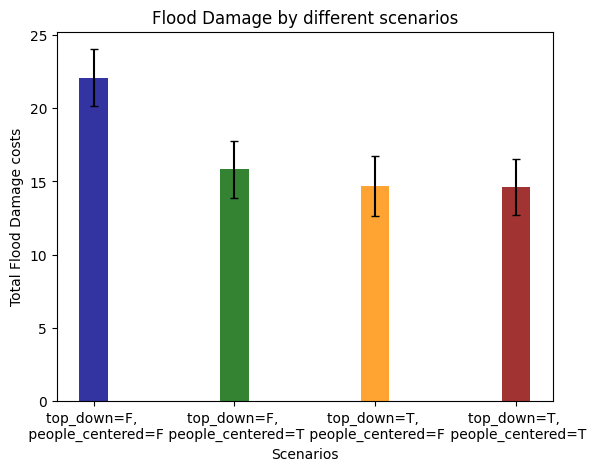

In [7]:
number_runs = 300
# Define the different top_down and people_centered settings
top_down_settings = [False, True]
people_centered_settings = [False, True]

flood_damage_data = pd.DataFrame()
# Set the flood map choice to 'harvey'
flood_map_choice = "harvey"

# Create a new figure
fig, ax = plt.subplots()

# Define the width of the bars
bar_width = 0.2

# Define the opacity for the bars
opacity = 0.8

# Define the bar positions
bar_positions = np.arange(4)
run = 0
# Iterate over the different top_down settings
for i, top_down in enumerate(top_down_settings):
    # Iterate over the different people_centered settings
    for j, people_centered in enumerate(people_centered_settings):
        # List to store data from each run
        all_data = []
        run+=1
        # Run the model multiple times and collect data
        for k in range(number_runs):
            # Initialize the Adaptation Model with the current settings
            model = AdaptationModel(number_of_households=50, flood_map_choice=flood_map_choice, network="watts_strogatz", top_down=top_down, people_centered=people_centered)

            # Run the model for 20 steps.
            for step in range(20):
                model.step()

            # Collect 'FloodDamageActual' data after each run
            model_data = model.datacollector.get_agent_vars_dataframe()
            flood_damage_actual = model_data['FloodDamageActual']
            flood_damage_actual_sum = flood_damage_actual.groupby(level=0, axis=0).sum()

            # Collect only 'total_flood_damage' data from the last step
            # Convert sum to DataFrame and append to list
            sum_df = pd.DataFrame([flood_damage_actual_sum.loc[19]], columns=[f'Run {k+1}'])
            all_data.append(sum_df)

        # Convert list of DataFrames to a single DataFrame
        all_data_df = pd.concat(all_data, axis=1)
        flood_damage_data = pd.concat([flood_damage_data,all_data_df],axis=0,ignore_index=True)
        # Calculate mean and standard deviation
        mean = all_data_df.mean(axis=1)
        print(mean)
        std = all_data_df.std(axis=1)

        # Create bar plot
        rects = ax.bar(bar_positions[run-1], mean, bar_width, alpha=opacity, color=['darkblue', 'darkorange', 'darkgreen', 'darkred'][i+j*2], yerr=std, capsize=3, label=f'top_down={top_down}, people_centered={people_centered}')

# Label axes
ax.set_xlabel('Scenarios')
ax.set_ylabel('Total Flood Damage costs') #since we studied the relationship of saved costs between various scenarios we kept the outcome a factor
ax.set_title('Flood Damage by different scenarios')
ax.set_xticks(bar_positions) # + bar_width / 2
ax.set_xticklabels(('top_down=F, \n people_centered=F', 'top_down=F, \n people_centered=T', 'top_down=T, \n people_centered=F', 'top_down=T, \n people_centered=T'),rotation=0)

# Show the plot
plt.show()

# Statistical Tests on outcomes

In [8]:
flood_damage_data.index= ["none","top_down","people_centered","both"]
flood_damage_data

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,...,Run 291,Run 292,Run 293,Run 294,Run 295,Run 296,Run 297,Run 298,Run 299,Run 300
none,19.271752,23.476054,20.354959,22.611323,20.762308,22.019501,19.053183,20.894865,22.682817,25.004155,...,18.612186,22.374594,23.102968,21.855171,17.782517,17.643203,23.614238,26.176343,23.873103,21.200416
top_down,17.781928,16.876373,16.613395,14.168287,14.397412,16.795058,13.953026,16.388494,18.054938,16.798624,...,16.883747,17.635719,14.641020,16.152801,20.380444,16.491647,16.925542,20.004631,13.810969,13.581194
people_centered,20.107357,17.043138,15.541336,16.303744,15.933897,15.954374,11.687117,12.246586,17.395562,14.382356,...,12.227220,16.178013,12.884915,13.221539,12.875974,16.447609,18.628364,15.010585,12.403979,14.006955
both,14.844377,16.567392,12.911018,15.671634,13.823962,17.175750,15.424013,14.688123,16.825526,15.274455,...,13.054896,15.976896,13.032570,14.714535,14.119636,13.312919,14.961401,14.592561,12.848171,14.380480


In [9]:
stats.shapiro(flood_damage_data.iloc[2,:])

ShapiroResult(statistic=0.9963102511585864, pvalue=0.7139481170591435)

In [10]:
stats.wilcoxon(flood_damage_data.iloc[3,:],flood_damage_data.iloc[2,:])

WilcoxonResult(statistic=22064.0, pvalue=0.7339941631167946)